# Exploring data

Prior to doing any sort of machine learning, we need to understand our data. This can mean ensuring that

- we know how to combine multiple data sources if we need to
- the columns are what we think they are
- the column types are correct
- that we are aware of missing values or extreme values
- that we are aware of the statistical **distribution** of the columns (**univariate** analysis)
- that we are aware of how the columns in the data are related to each other (**bivariate or multivariate relationships**)

We commonly refer to the above tasks and other similar ones as **EDA (exploratory data analysis)** and it is a very important task in data science, because it can guide us in how we need to process the data in preparation for modeling and what kinds of algorithms or modeling strategies the data lends itself to.

Let's now read some data and start exploring it.

In [1]:
import pandas as pd

cars = pd.read_csv("../data/cars.csv")
cars.head()

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Notice what happens if we say `headers = None`:

In [2]:
cars = pd.read_csv("../data/cars.csv", header = None)
cars.head()

,0,1,2,3,4,5,6
0,buying,maint,doors,persons,lug_boot,safety,evaluation
1,vhigh,vhigh,2,2,small,low,unacc
2,vhigh,vhigh,2,2,small,med,unacc
3,vhigh,vhigh,2,2,small,high,unacc
4,vhigh,vhigh,2,2,med,low,unacc


In [3]:
type(cars)

pandas.core.frame.DataFrame

In [4]:
cars.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
6    object
dtype: object

One very common task with data is to **subset** the data, also called **slicing** or **filtering**. We can subset data by rows, by columns, or both. We can subset data using numeric indices (positions), or using some kind of conditional logic. If we subset data using numeric indices, we need to remember that **in Python indexing starts at 0**, not at 1.

In [5]:
cars = pd.read_csv("../data/cars.csv")
cars.head()

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Let's start by pulling some basic information about our data.

In [6]:
cars.shape # number of rows and columns

(1728, 7)

In [7]:
cars.dtypes # prints column types

buying        object
maint         object
doors         object
persons       object
lug_boot      object
safety        object
evaluation    object
dtype: object

In [8]:
list(cars.columns) # column names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'evaluation']

In [9]:
cars.index # row indexes

RangeIndex(start=0, stop=1728, step=1)

Let's get some basic summary statistics about the columns in the data.

In [10]:
cars.describe()

,buying,maint,doors,persons,lug_boot,safety,evaluation
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


Let's see how we can rename the columns in our data.

In [11]:
new_col_names = ["buying", "maintenance", "num_doors", "num_persons", "lug_boot", "safety", "evaluation"]
cars.columns = new_col_names
cars.head()

,buying,maintenance,num_doors,num_persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Exercise (2 minutes)

There's another way we can rename columns by using the `rename` method. Look at the documentation for it and write a line of code that renames the `evaluation` and `safety` columns to `eval` and `safe` respectively.

In [12]:
cars2 = cars.rename(columns = {'evaluation': 'eval', 'safety': 'safe'})
print(cars2)


     buying maintenance num_doors num_persons lug_boot  safe   eval
0     vhigh       vhigh         2           2    small   low  unacc
1     vhigh       vhigh         2           2    small   med  unacc
2     vhigh       vhigh         2           2    small  high  unacc
3     vhigh       vhigh         2           2      med   low  unacc
4     vhigh       vhigh         2           2      med   med  unacc
...     ...         ...       ...         ...      ...   ...    ...
1723    low         low     5more        more      med   med   good
1724    low         low     5more        more      med  high  vgood
1725    low         low     5more        more      big   low  unacc
1726    low         low     5more        more      big   med   good
1727    low         low     5more        more      big  high  vgood

[1728 rows x 7 columns]


You should not be surprised to find out that there is usually more than one way of doing things when it comes to many of the things we learn in this course. As much as possible, when you try to do something, it's good to first find out if `pandas` (or other libraries) has a method for it. It can be fun and educational to do things from scratch from time to time, but generally we want to keep up with the functionality that various data science libraries have and use them to make our lives easier.

### End of exercise

We use the `iloc` method to subset data by its index or position (named index).

In [13]:
cars.iloc[4, 2] # show the 5th row, 3rd column

'2'

In [14]:
cars.iloc[1:5, 1:3] # 2nd through 5th row, 2nd and 3rd column

,maintenance,num_doors
1,vhigh,2
2,vhigh,2
3,vhigh,2
4,vhigh,2


Subsetting columns of the data using `iloc` is **not recommended**, because it makes the code hard to understand and because the position of a column in the data can change, which would break our code. It's much more common to subset columns using their names instead of their positions. For that we can use the `loc` method.

In [15]:
cars.loc[1:5, ["maintenance", "num_doors"]]

,maintenance,num_doors
1,vhigh,2
2,vhigh,2
3,vhigh,2
4,vhigh,2
5,vhigh,2


Note how `loc` and `iloc` are methods, but their arguments are specified inside square brackets instead of parenthesis. This is done for historical reasons. Usually, methods are like functions and their arguments are inside parenthesis.

There's another way we can subset the data by using the `filter` method instead of `loc` or `iloc`. In the case of filter, we need to specify the `axis` argument to say if the filter applies to rows (`axis = 0`) or columns (`axis = 1`).

In [16]:
cars.filter(items = range(1, 5), axis = 0).filter(items = ["maintenance", "num_doors"], axis = 1)

,maintenance,num_doors
1,vhigh,2
2,vhigh,2
3,vhigh,2
4,vhigh,2


Note from the below example that `filter` seems much more verbose and un-intuitive than using `loc` or `iloc`, but it has its advantages.

### Exercise (3 minutes)

- Let's say we want to show the columns in the data that start with `num_`. Write a program that uses `loc` to do this.

In [17]:
cars.loc[:,[x for x in cars.columns if "num_" in x]]

,num_doors,num_persons
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
1723,5more,more
1724,5more,more
1725,5more,more
1726,5more,more


In [18]:
cars.loc[:,  [x for x in cars.columns if x.startswith("num_")]]

,num_doors,num_persons
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
1723,5more,more
1724,5more,more
1725,5more,more
1726,5more,more


- Can you use the below snippet to simplify your code?

In [19]:
#cars.columns.str.startswith("num_")
cars.loc[:,  cars.columns.str.startswith("num_")]

,num_doors,num_persons
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
1723,5more,more
1724,5more,more
1725,5more,more
1726,5more,more


- Now check the documentation for `filter` and use it to do the same.

In [20]:
cars.filter(like = "num", axis = 1)

,num_doors,num_persons
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
1723,5more,more
1724,5more,more
1725,5more,more
1726,5more,more


### End of exercise

A very common thing to do when working with tabular data is to point to a single column of it. For example, we may want to

- change the type of a single column
- do a log transformation on a single column
- create a new column that is the sum of two other columns

and so on. So based on what we learned so far, we know that we can use `loc` to point to a single column.

In [21]:
cars.loc[:, "num_persons"].head()

0    2
1    2
2    2
3    2
4    2
Name: num_persons, dtype: object

But because pointing to single columns is such a common thing to do, `pandas` offers a shortcut for doing this. Instead of typing `data.loc[:, "x"]` to reference column `x` in `data`, we can use `data["x"]` or `data.x`. Note that the second option is only possible if the column name does NOT contain any space.

In [22]:
cars["num_persons"].head()

0    2
1    2
2    2
3    2
4    2
Name: num_persons, dtype: object

In [23]:
cars[["num_persons"]].head()

,num_persons
0,2
1,2
2,2
3,2
4,2


In [24]:
cars.num_persons.head()

0    2
1    2
2    2
3    2
4    2
Name: num_persons, dtype: object


***
***
***
# Lesson 04 In-class Quiz #1
***
***
***


### Exercise (7 minutes)

Notice that the type of `num_persons` is `object`. Why did that happen? It looks like it should be of type `integer` and not `object` (which is more appropriate for categorical data). 

- List the unique values for this column. You can use the `unique` method to get the unique values

In [25]:
cars["num_persons"].unique()

array(['2', '4', 'more'], dtype=object)

- Use the `value_counts` method to get the unique values now. It has the advantage of returning counts for the unique values. Can you figure out how to display the counts as percentages?

In [26]:
cars["num_persons"].value_counts()

num_persons
2       576
4       576
more    576
Name: count, dtype: int64

- Write a loop to get unique counts for each of the columns in the data.

In [27]:
{x: cars[x].value_counts() for x in cars.columns}


{'buying': buying
 vhigh    432
 high     432
 med      432
 low      432
 Name: count, dtype: int64,
 'maintenance': maintenance
 vhigh    432
 high     432
 med      432
 low      432
 Name: count, dtype: int64,
 'num_doors': num_doors
 2        432
 3        432
 4        432
 5more    432
 Name: count, dtype: int64,
 'num_persons': num_persons
 2       576
 4       576
 more    576
 Name: count, dtype: int64,
 'lug_boot': lug_boot
 small    576
 med      576
 big      576
 Name: count, dtype: int64,
 'safety': safety
 low     576
 med     576
 high    576
 Name: count, dtype: int64,
 'evaluation': evaluation
 unacc    1210
 acc       384
 good       69
 vgood      65
 Name: count, dtype: int64}

In [28]:
[(cars[x].value_counts()) for x in cars.columns]

[buying
 vhigh    432
 high     432
 med      432
 low      432
 Name: count, dtype: int64,
 maintenance
 vhigh    432
 high     432
 med      432
 low      432
 Name: count, dtype: int64,
 num_doors
 2        432
 3        432
 4        432
 5more    432
 Name: count, dtype: int64,
 num_persons
 2       576
 4       576
 more    576
 Name: count, dtype: int64,
 lug_boot
 small    576
 med      576
 big      576
 Name: count, dtype: int64,
 safety
 low     576
 med     576
 high    576
 Name: count, dtype: int64,
 evaluation
 unacc    1210
 acc       384
 good       69
 vgood      65
 Name: count, dtype: int64]

We saw how we can use `value_counts` to get unique values and their counts for some column, also called a **one-way table**. What if we want counts for all the combinations of two categorical columns? In statistics, we call this a **two-way table**. 

- Use the `pd.crosstab` function to get counts for all combinations of `num_doors` and `num_persons`. What does setting `margins = True` add to the results?

In [29]:
pd.crosstab(cars["num_doors"], cars["num_persons"], margins = True)

num_persons,2,4,more,All
num_doors,,,,
2,144,144,144,432
3,144,144,144,432
4,144,144,144,432
5more,144,144,144,432
All,576,576,576,1728


- Find out how you can sort the `cars` data by `num_doors` and descending `num_persons`. See if you can find out what the `inplace` argument does. This is a common argument that many `DataFrame` methods have. It's important to be aware of it.

In [30]:
cars.sort_values(by=['num_doors', 'num_persons'], ascending=[True, False])


,buying,maintenance,num_doors,num_persons,lug_boot,safety,evaluation
18,vhigh,vhigh,2,more,small,low,unacc
19,vhigh,vhigh,2,more,small,med,unacc
20,vhigh,vhigh,2,more,small,high,unacc
21,vhigh,vhigh,2,more,med,low,unacc
22,vhigh,vhigh,2,more,med,med,unacc
...,...,...,...,...,...,...,...
1705,low,low,5more,2,med,med,unacc
1706,low,low,5more,2,med,high,unacc
1707,low,low,5more,2,big,low,unacc
1708,low,low,5more,2,big,med,unacc


### End of exercise

Let's now read another data set. Don't worry, this one is also about cars!

In [31]:
import pandas as pd
import numpy as np
# you need to run the following line to produce visualizations in a jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

auto = pd.read_csv('../data/auto-mpg.csv', sep = '\s+', header = None, 
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                            'acceleration', 'model year', 'origin', 'car_name'])
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Let's talk about data visualization, or **data viz** as the kids call it. There are two common libraries for data viz: `matplotlib` and `seaborn`. Both are used to create static plots. There are also libraries such as `bokeh` for creating dynamic visualizations, but we leave it to you to explore them. 

The `matplotlib` library is more **low-level** meaning you usually have to write more code to produce and customize your plot. The `seaborn` library is more **high-level** meaning that the plots usually look pretty good without too much work. Seaborn is built on matplotlib, so you can still use the same low level controls for things like the size and shape of the plot.

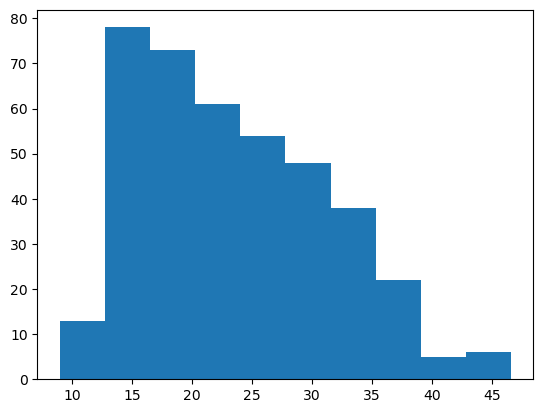

In [32]:
# matplotlib example histogram. The ; suppresses a text 
# output that can be distracting, a rare use of ; in Python
plt.hist(auto['mpg']);

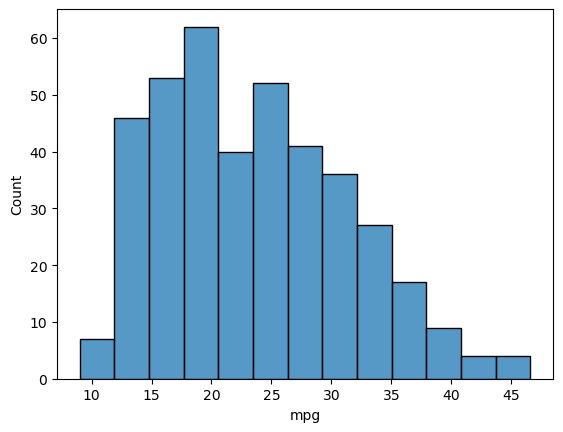

In [37]:
# there are several seaborn histogram plots including histplot and displot
sns.histplot(auto["mpg"]);

The `seaborn` library has a function called `pairplot` which can be used to get a **scatter plot matrix**, which is a matrix whose diagonal elements are histograms of each column in the data and whose off-diagonal elements are scatter plots of any pair of columns in the data. A histogram is what we call a **univariate** visualization, i.e. summarizes a single variable, and a scatter plot is a **bivariate** visualization, because it shows the relationship between two variables. 

Note that for **large datasets**, plotting scatter plots is usually **not a good idea** because it can be very slow. So if the data is very large use the `sample` method to take a sample of it before you plot any scatter plots.

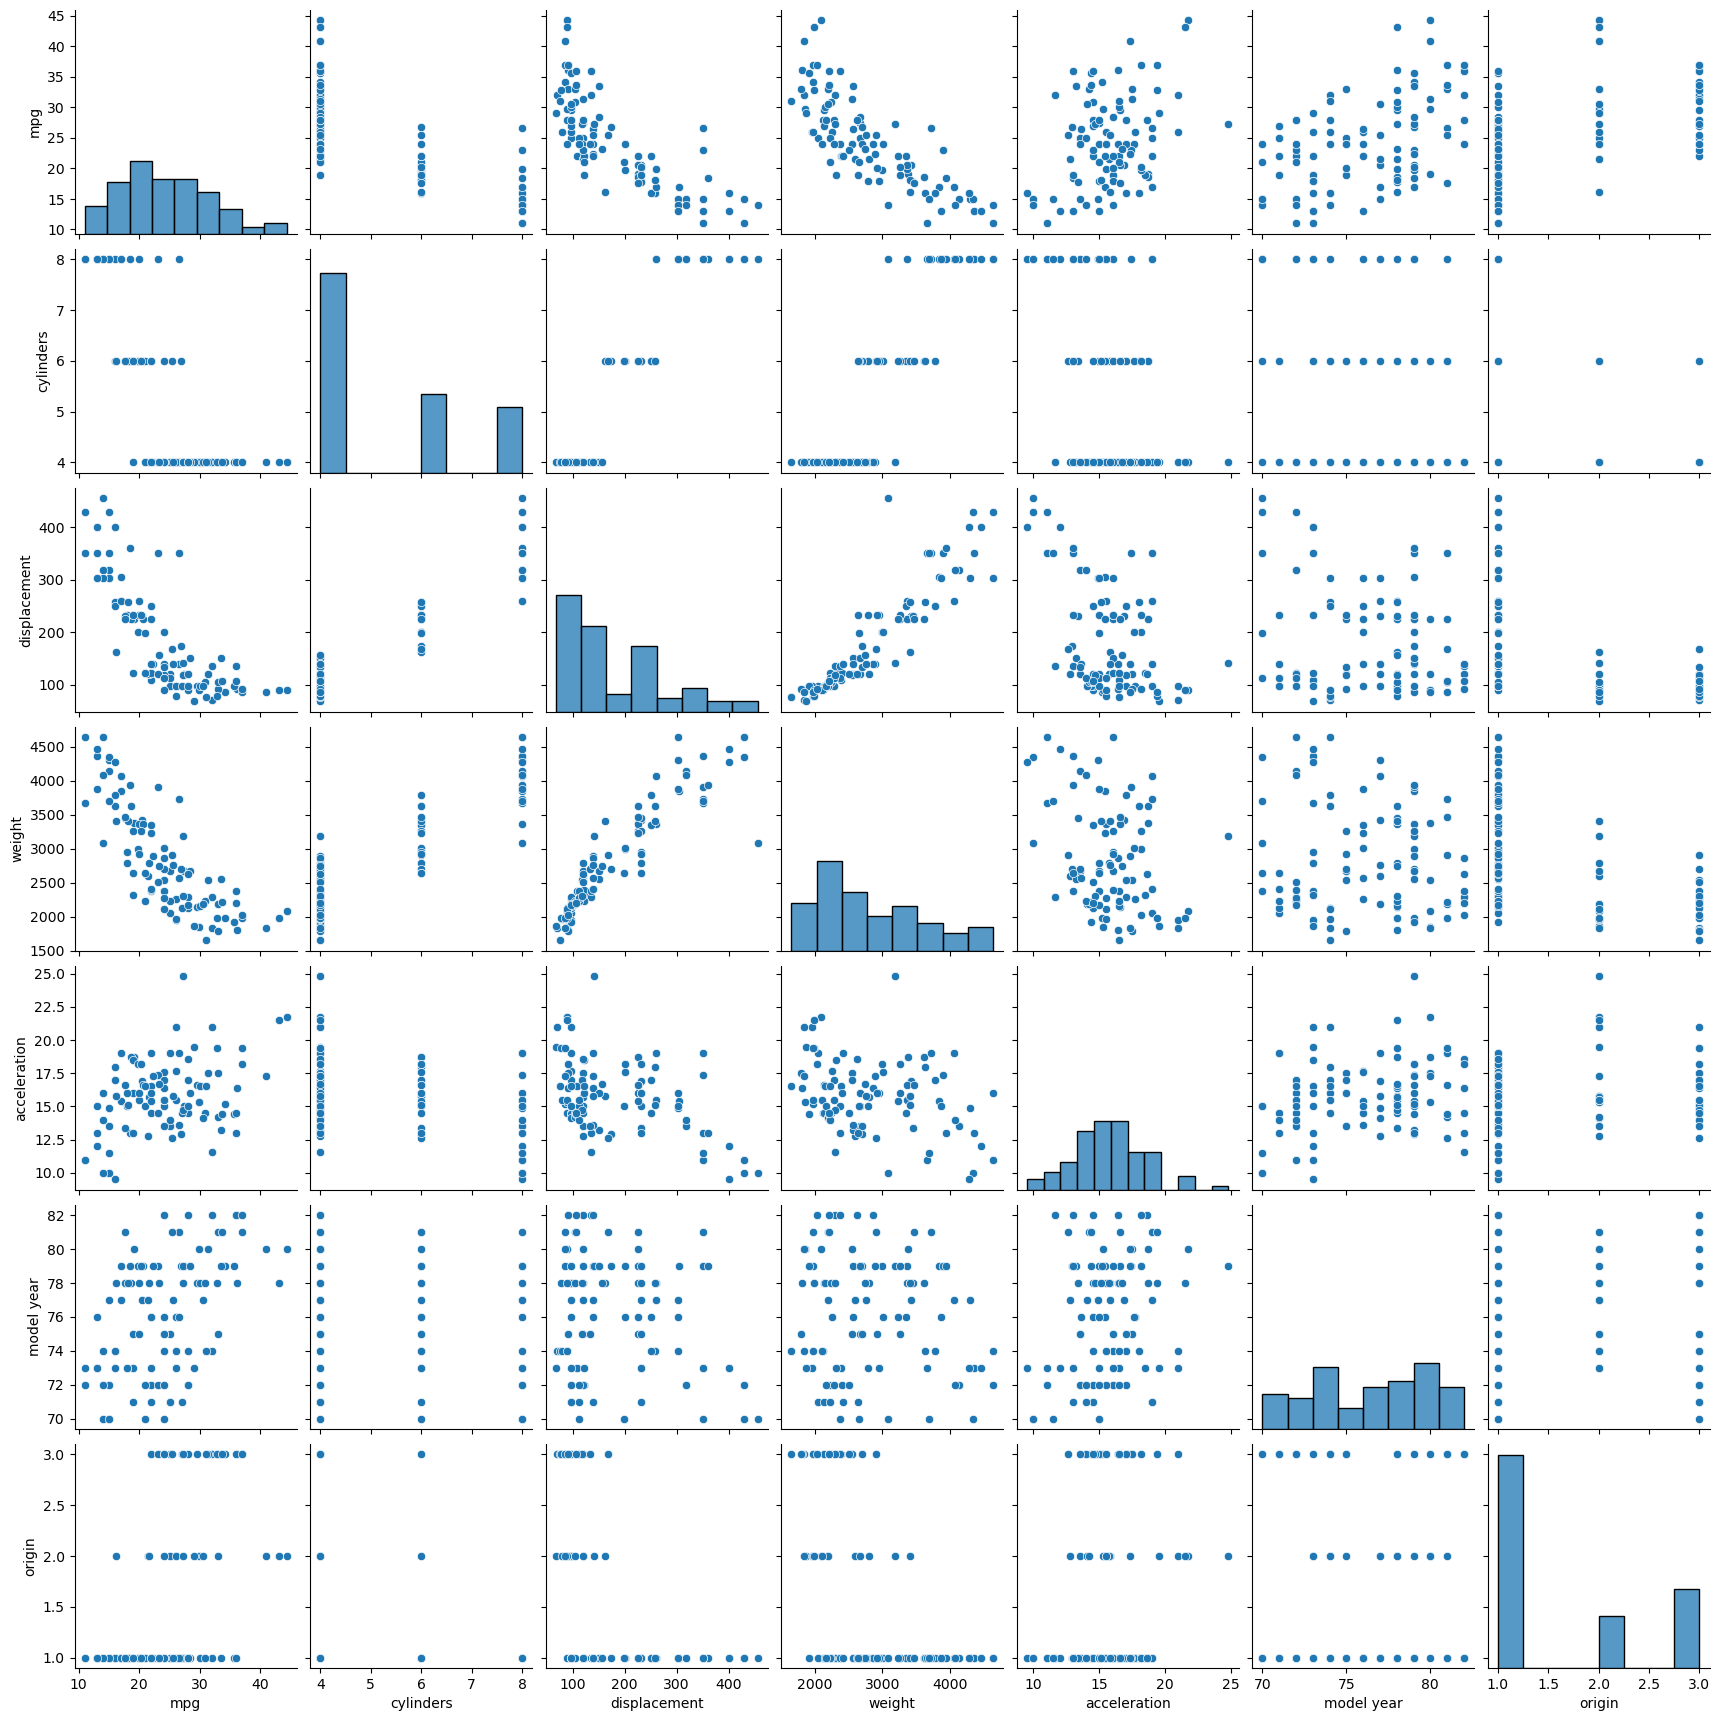

In [34]:
sns.pairplot(auto.sample(100));

Similar to the scatter plot matrix, we can also show the **correlation matrix** by just calling `corr` on the `DataFrame`, which is the correlation of any pairs of numeric columns in the data.

In [35]:
sns.heatmap(auto.corr())

ValueError: could not convert string to float: '?'

Horsepower should also be related to mpg cylinders and displacement.  Why isn't horsepower in the scatter plot or correlation matrix?

In [ ]:
auto.dtypes

Horsepower has some missing values and they are encoded as "?".  The "?" contaminates the whole variable because it makes the variable of type object/string and not numeric.

We saw earlier how we can use `loc` to subset the data. We're going to use it here again, but this time we're subsetting the data by rows that meet a certain **condition**. In this case, the condition is `auto['horsepower'] == '?'`, which means cases where `horsepower` is the string `?`.

In [ ]:
hp_na = auto['horsepower'] == '?'
wt_gt_2500 = auto['weight'] > 2500
auto.loc[hp_na & wt_gt_2500, :]

We can add additional conditions, but need to wrap each condition in parentheses and separate them by and (`&`) and or (`|`). Here is an example:

In [ ]:
auto.loc[(auto['horsepower'] == '?') & (auto['acceleration'] > 17)]

At some point, with lots of conditions, the code starts to look nasty, so it's good to refactor it to make it more readable:

In [ ]:
hp_missing = auto['horsepower'] == '?'
acc_gt_17 = auto['acceleration'] > 17
auto.loc[hp_missing & acc_gt_17] # the parenthesis are not needed anymore

We can use `~` to negate a condition.

In [ ]:
auto.loc[hp_missing & ~acc_gt_17]

### Exercise (4 minutes)

- Try to plot the distribution of `horsepower`. Are you getting an error? There's a good reason: as we saw earlier, some of the rows have the string `?` for `horsepower`. 

In [ ]:
auto2 = auto.copy()

In [ ]:
auto2['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
#auto['horsepower'].hist(bins=20)
sns.histplot(auto2['horsepower'])

We can use the function `pd.to_numeric` to convert a string or categorical column into numeric (pay attention to the `errors` argument).

- Convert `horsepower` to type `numeric` and then plot its distribution.

### End of exercise

We saw that `horsepower` has missing values, although the data uses the string `?` to mark them as missing. This is not a good idea, because as the previous exercise showed we run into problems when we want to analyze or visualize the column. For example let's see what the average value is for `horsepower`. There are two identical ways we can get the average of a column:

- we can call the `mean` method on the column
- we can use the `mean` function in numpy

Once again, which is best is a matter of preference. Uncomment the code below and run it. You'll notice that we get an error. Note that you can use `CTRL+/` to comment and uncomment code.

In [ ]:
auto['horsepower'].mean() # pandas series mean
# np.mean(auto['horsepower']) # numpy mean

So we need to convert `horsepower` to numeric so that we can get the average. We saw one way of doing that using `pd.to_numeric`: 

In [ ]:
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors = "coerce")

In [ ]:
auto.describe()

But what exactly happened to the rows where `horsepower` is `?`? They were converted into `NaN` which stands for "Not a Number". It is similar to null values in SQL tables. We can use the `isnull` method to find rows with missing values, which works with both numeric and categorical columns.

In [ ]:
auto.loc[auto['horsepower'].isnull(), :]

Now let's get the average and the median for `horsepower`.

In [ ]:
auto['horsepower'].mean()

In [ ]:
auto['horsepower'].median() # the median is the "middle value" if we sort the data

Many machine learning algorithms do not like missing values. So we need to deal with the missing values prior to passing the data to the ML algorithm. There are two main ways we can do so: drop them from the data, or impute the missing values.

Dropping is a **conservative** approach and not recommended if the data is small (we later learn that how small depends partly on what ML algorithm we use).

In [ ]:
auto_nona = auto.dropna() # this is how we drop any rows with nulls
auto_nona.head()

In [ ]:
auto_nona['horsepower'].mean()

### Exercise (4 minutes)

Instead of dropping rows where **any** column is missing, we can drop rows where **certain** columns are missing. 

- Examine `dropna` and see how you can modify it so you drop only the rows for where `horsepower` **and** `displacement` are missing (notice that we said **and**, not **or**).

In [ ]:
auto_nona2 = auto.dropna(subset=['horsepower', 'displacement'], how='all', inplace=False)
auto_nona2.head()

Instead of dropping the missing values, we can **impute** them: By imputing, we mean replacing the missing values with something that makes sense. Imputation is a more reasonable approach than just dropping missing values, but there is more than one way to impute missing values and we need to proceed carefully. One simple approach is to replace missing values for each column with the mean or median for that column, or the "mode" for categorical columns.

- Replace the missing values for `horsepower` with the median value. HINT: 
  - You use `isnull` to find out if `horsepower` is missing.
  - You use `loc` to find the subset of the data where `horsepower` is missing.
  - You use `median` to find the median value for `horsepower`.

In [ ]:
auto.loc[auto['horsepower'].isnull(), :]

In [ ]:
auto2 = auto.copy()

In [ ]:
auto2.loc[auto2['horsepower'].isnull(), 'horsepower'] = auto2['horsepower'].median()

In [ ]:
auto2['horsepower'].isnull().value_counts()

In [ ]:
auto['horsepower'].isnull()

### End of exercise

By now you should be able to use `pandas` to do a lot of data processing, mostly using one or two lines of code. Make sure you practice the content of this notebook a few times so you're comfortable with all of it. We will return to these concepts over and over again in future lectures.

# Assignment (Milestone 1)

In this assignment, we want to read in the `online_retail.csv` dataset and run some EDA on the data. This dataset was derived from the Online Retail II dataset contributed by Daqing Chen to the [UCI Machine Learning Repository](https://doi.org/10.24432/C5CG6D) in 2019.

Generally speaking, when we run EDA on a dataset, we don't have a particular goal in mind. Instead we want to get a "gut-feel" for what the data looks like. The goal of the assignment is to show your ability to examine a dataset with increasing depth as you go.

In [ ]:
import pandas as pd
import numpy as np # added for assignment

churn = pd.read_csv("../data/online_retail.csv")
churn.head()

Here are some examples of questions we can be asking:

1. How many rows and columns are in the dataframe?  What are the columns, their types and their distribution (when it makes sense)?  <span style="color:red" float:right>[1 point]</span>

2. Column Type Analysis
- `invoice_id` looks like an integer from .head(), but has type object. Why? <span style="color:red" float:right>[1 point]</span>
- `customer_id` seems like it should be an integer, but is a float. Why? <span style="color:red" float:right>[1 point]</span>
- `invoice_date` is an object, but should be a datetime. Make the conversion, sort the data by ascending date and then by invoice_id (for identical date times), and reset the index. <span style="color:red" float:right>[1 point]</span>

3. Do any columns appear to have unique rows? How do we show that? If any rows have almost unique values, explore the data to determine why. Take any appropriate action to clean the data based on this insight. <span style="color:red" float:right>[1 point]</span>

4. What are some "obvious" questions we can ask about the data? We can ask many questions here, but we limit it to two:
   - Is quantity or volume ever negative and why? <span style="color:red" float:right>[1 point]</span>
   - Are there missing values in the data? If the goal of this analysis is to eventually predict customer churn, how should rows with missing data be handled? <span style="color:red" float:right>[1 point]</span>  

5. What are some "not-so-obvious" questions we can ask about this data? What are some important summary statistics and visualizations we should look at to answer them? Note that having domain knowledge can make this easier, so here's a list of questions and your task is to pick at least one question and answer it using statistical summaries or visualizations:
   - How many transactions on average do users have in a given week? <span style="color:red" float:right>[2 point]</span>
   - How do quantity sold and total sales tend to change over the course of the day (hour by hour)? <span style="color:red" float:right>[2 point]</span>
   - How long do customers typically go between purchases? <span style="color:red" float:right>[2 point]</span>
Note that the above questions are intentionally phrased to sound non-technical. It is up to you to "translate" them into something that can be answered by a query on the data or a visualization.

6. What are additional features we could extract from the data? This is especially relevant if the data contains a timestamp column or raw text column (such as a full address for example). <span style="color:red" float:right>[1 point]</span>

7. Do I see any relationships between the features in the data? You will need to back this up with some statistical summaries or visualizations like what we covered in the lab. <span style="color:red" float:right>[2 point]</span>

Run EDA on the data and answer the above questions and any additional questions that may cross your mind along the way. As you can imagine, there isn't a single way to proceed, and the answer doesn't always have to be exact. It is up to you to decide how you want to convey the results, but assume that your audience is non-technical and not familiar with some of the terminology we learned in the lecture.

There are also third-party libraries we can use to run EDA. One example is the `pandas-profiling` library which provides us with a full report. You do not need to use it in this assignment, but we recommend that you install it and take a look on your own time.

# End of assignment